In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the boston house price dataset


In [ ]:
house_price_dataset = sklearn.datasets.load_boston()

In [ ]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
# Load the dataset into a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns= house_price_dataset.feature_names )

In [ ]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#adding target column (price)
house_price_dataframe["price"] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
house_price_dataframe.shape


(506, 14)

In [ ]:
#missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [ ]:
#therefore no missing values
# mean , standard deviation and percentage of the data
house_price_dataframe.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Determining the correaltion between various features in the dataset


In [ ]:
correlation = house_price_dataframe.corr()


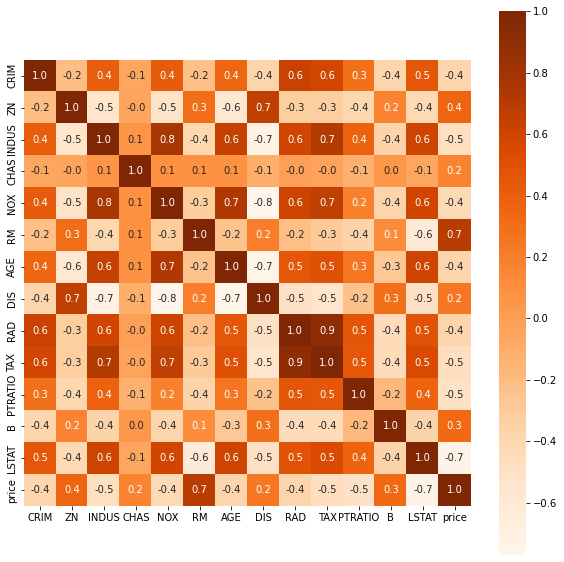

In [ ]:
#making a heat map of the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Oranges')

Splitting the data and target

In [ ]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']


In [ ]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

Splitting the data into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Training the model

XGBoost Regressor

In [ ]:
#load the model
model = XGBRegressor()

In [ ]:
# training the model with the training dataset
model.fit(X_train, Y_train)

[14:22:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Evaluation

Prediction on training data

In [ ]:
#accuracy for prediction of price of the training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[25.048151  22.662462   8.458681  20.905691  14.563758  25.679934
 27.51617   25.37881   45.644592  24.045649  10.660132  34.127537
 35.430862  36.522556  19.133648  18.85809   33.91484   47.677933
 20.870264  12.973117  29.153881  19.872124  24.924599  20.954975
 23.946466  19.023764  21.054193  26.7249    20.423717  22.496307
 25.230143   9.525525  24.883894  35.10766   13.956592  14.212715
 41.281284  11.095758  20.670912  15.821131  18.054611  23.936049
 29.978254  22.352541  23.109278  15.936208  27.03913   19.348799
 35.163136  14.839837  20.046473  17.663183  13.28538   29.442507
 24.924572  24.269297  22.715654  25.922625  43.211594  22.728882
 26.43058   15.387772  19.288763  21.005173  23.366146  11.016834
 15.550854  23.922337  20.622755  20.264856  15.010928  29.927689
 19.244297  23.75609   29.657944  20.367489  48.066456  21.156334
 19.50832   22.898682  17.519705  30.349104  11.508479  20.874737
 20.64511   38.51378   20.53336   21.551672  19.98694   14.073284
 20.957743

In [ ]:
print(training_data_prediction.shape)
print(Y_train.shape)

(404,)
(404,)


In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print("R squared error : ",score_1)

R squared error :  0.9748911529344064


In [ ]:
#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [ ]:
print("Mean absolute error: ",score_2)

Mean absolute error:  1.095920478235377


visualizing the actual prices and the predicted prices

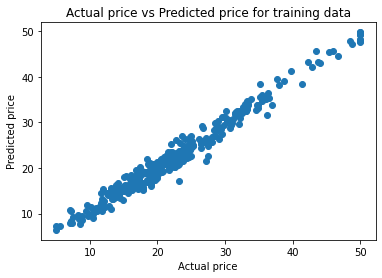

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price for training data")
plt.show()

Prediction on test data

In [ ]:
training_data_prediction = model.predict(X_test)
print(training_data_prediction)


[30.244747  27.42247   18.674818  21.062233  19.502811  20.532555
 27.66085   19.257133  19.98536   23.833563  28.730656  31.196053
 21.348223  20.080647  20.323883  32.001266  13.431162  43.769253
 23.777906  13.810081  20.28751   18.685682  25.17288   23.20837
 25.979816   9.0411625 15.107858  19.099976  43.958298  11.316055
 25.513964  17.687452  47.799717  16.05972   24.20881   20.856007
 16.045425  33.218906  14.518764  18.672695  25.420147  22.42197
 25.21465   15.7080145 17.159494  10.712171  48.539387  13.893352
 21.554802  17.34883   22.977318  21.135798  25.379213  22.05767
 11.151794  22.087044  12.40361   24.72886   17.784662  39.95547
 15.510622  25.497536  11.903179  14.375509  18.661009  39.615936
 40.431355  22.80781   21.114948  21.5172    23.904251   7.890534
 17.914284  20.903948  20.543924  20.891003  42.057674  23.300877
 25.278925  32.921463  16.744448  21.018211  34.063213  10.3202915
 22.453043  25.597956  14.615002  26.29593   20.105114  16.749098
 22.28874   4

In [ ]:
print(Y_test)

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
92     22.9
224    44.8
110    21.7
426    10.2
443    15.4
Name: price, Length: 102, dtype: float64


In [ ]:
score_1 = metrics.r2_score(Y_test, training_data_prediction)
print("R squared value:", score_1)

R squared value: 0.9196210387570751


In [ ]:
score_2 = metrics.mean_absolute_error(Y_test, training_data_prediction)
print("Mean Absolute Error:", score_2)

Mean Absolute Error: 2.2178991551492726


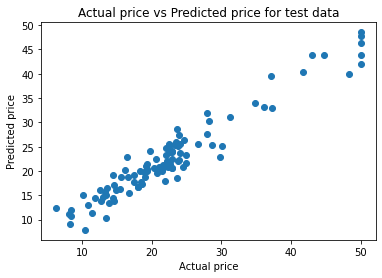

In [ ]:
plt.scatter(Y_test, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price for test data")
plt.show()